In [438]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Gerando o dataframe

In [439]:
files = !ssh gabriel@neuron0 ls -l /home/gabriel/repos/PyTorch-RL/checkpoint | awk 'NF>1{print $NF}'
files = [file for file in files if len(file) > 100]

In [440]:
for file in files:
    fpath = directory +'/'+ file
    !mkdir $fpath


mkdir: cannot create directory ‘/home/gabriel/repos/PyTorch-RL/checkpoint//name_Saving_running_state_and_max_norm_deterministic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL’: File exists
mkdir: cannot create directory ‘/home/gabriel/repos/PyTorch-RL/checkpoint//name_Saving_running_state_and_max_norm_stochastic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL’: File exists
mkdir: cannot create directory ‘/home/gabriel/repos/PyTorch-RL/checkpoint//name_Testing_norm_deterministic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL’: File exists
mkdir: cannot create directory ‘/home/gabriel/repos/PyTorch-RL/checkpoint//name_Testing_norm_stochastic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL’: File exists


In [441]:
directory='/home/gabriel/repos/PyTorch-RL/checkpoint/'

In [442]:
!ls $directory

name_Saving_running_state_and_max_norm_deterministic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL
name_Saving_running_state_and_max_norm_stochastic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL
name_Testing_Deterministic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL
name_Testing_GAILS_2_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL
name_Testing_norm_deterministic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL
name_Testing_norm_stochastic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL
name_Testing_Stochastic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL


In [481]:
for file in files:
    fpath = directory +'/'+ file
    print(fpath)
    fpath2 = os.path.join(fpath,'progress.csv')
#     print()
    print(fpath2)
    !scp -r gabriel@neuron0:$fpath2 $fpath

/home/gabriel/repos/PyTorch-RL/checkpoint//name_Saving_running_state_and_max_norm_deterministic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL
/home/gabriel/repos/PyTorch-RL/checkpoint//name_Saving_running_state_and_max_norm_deterministic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL/progress.csv
progress.csv                                  100%   52KB  51.7KB/s   00:01    
/home/gabriel/repos/PyTorch-RL/checkpoint//name_Saving_running_state_and_max_norm_stochastic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL
/home/gabriel/repos/PyTorch-RL/checkpoint//name_Saving_running_state_and_max_norm_stochastic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL/progress.csv
progress.csv                                  100%   52KB  52.0KB/s   00:00    
/home/gabriel/repos/PyTorch-RL/checkpoint//name_

## Pegando todas as tabelas

In [482]:
dataframe_list = []
for subdir in [os.path.join(directory, o) for o in os.listdir(directory) 
                    if os.path.isdir(os.path.join(directory,o))]:
    
    fpath = os.path.join(subdir,'progress.csv')
    
    try:
        df=pd.read_csv(fpath,sep=';')
        name = (fpath.split('/')[-2])
        print("Name = ", name)
        df['name'] = name

        dataframe_list.append(df)    
        
    except:
        pass
    print()
df = pd.concat(dataframe_list, axis = 0,sort=False)

Name =  name_Testing_norm_deterministic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL

Name =  name_Saving_running_state_and_max_norm_deterministic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL

Name =  name_Testing_Deterministic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL

Name =  name_Saving_running_state_and_max_norm_stochastic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL

Name =  name_Testing_GAILS_2_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL

Name =  name_Testing_norm_stochastic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL

Name =  name_Testing_Stochastic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL



In [483]:
df = df[df['name'].str.contains('Testing_norm')].copy()

In [497]:

df.reset_index(drop=True, inplace=True)

df['total_timesteps']  = df.groupby('name')['num_steps'].apply( lambda x : x.cumsum())
df['total_episodes']  = df.groupby('name')['num_episodes'].apply( lambda x : x.cumsum())

df.set_index('total_episodes', inplace=True)

display(df.groupby('name').count())

,num_steps,num_episodes,total_reward,avg_reward,max_reward,min_reward,lenght_mean,lenght_min,lenght_max,lenght_std,total_c_reward,avg_c_reward,avg_c_reward_per_episode,max_c_reward,min_c_reward,discrim_loss,policy_loss,value_loss,explained_variance,clipfrac,entropy,aproxkl,total_timesteps
name,,,,,,,,,,,,,,,,,,,,,,,
name_Testing_norm_deterministic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2698,2732,2732,2732,2732
name_Testing_norm_stochastic_clip_0.2_minbatch_2048_lr_0.0003_optepochs_10_optbatchs_64_init_Discretized_Uniform_seed_42_GAIL,2741,2741,2741,2741,2741,2741,2741,2741,2741,2741,2741,2741,2741,2741,2741,2741,2741,2741,2693,2741,2741,2741,2741


# Plots indexados em total_timesteps

## True Rewards

Text(0.5, 1.0, 'Average Reward')

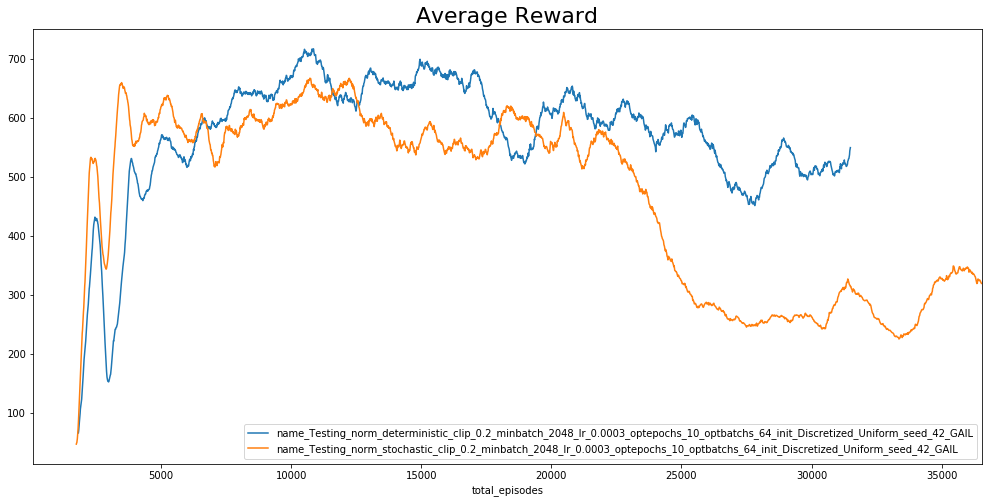

In [498]:
window_size = 50
fig , ax = plt.subplots(figsize=(17,8))

for name,group in df.groupby('name'):
    group['avg_reward'].rolling(window_size).mean().plot(ax = ax , label=name)
plt.legend()
plt.title('Average Reward',size=22)
    

Text(0.5, 1.0, 'MIN Reward')

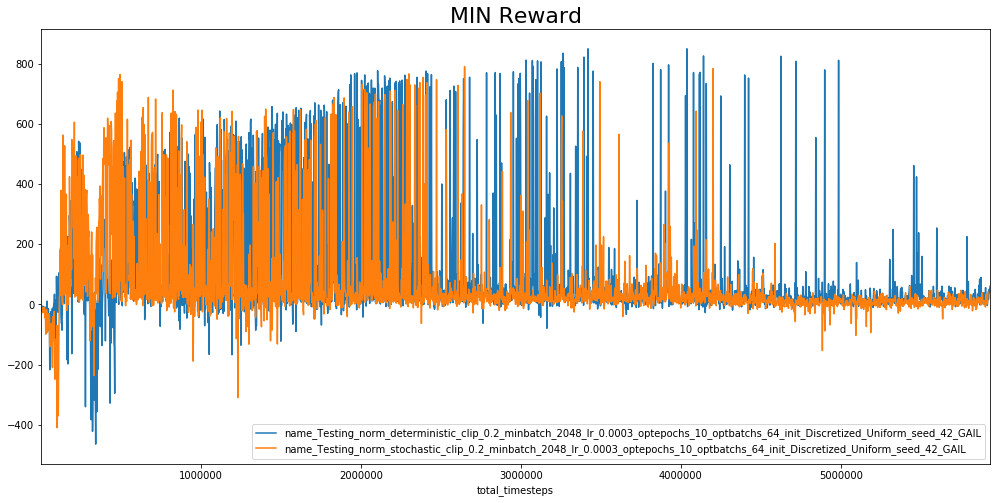

In [486]:
window_size = 1
fig , ax = plt.subplots(figsize=(17,8))
for name,group in df.groupby('name'):
    group['min_reward'].rolling(window_size).mean().plot(ax = ax , label=name)
plt.legend()
plt.title('MIN Reward',size=22)
    

## Lenghts

Text(0.5, 1.0, 'Lenght Mean')

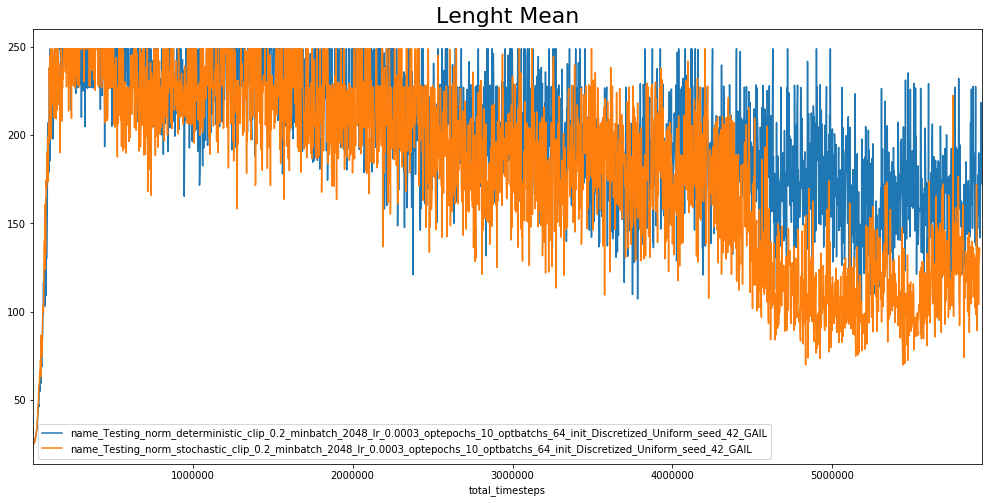

In [487]:
window_size = 1
fig , ax = plt.subplots(figsize=(17,8))
for name,group in df.groupby('name'):
    group['lenght_mean'].rolling(window_size).mean().plot(ax = ax , label=name)
plt.legend()
plt.title('Lenght Mean',size=22)
    

Text(0.5, 1.0, 'Lenght Min')

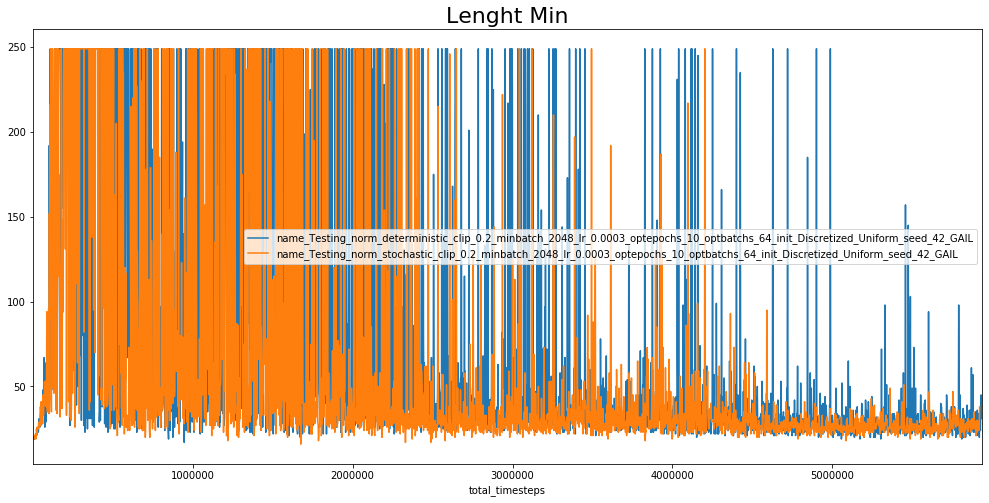

In [488]:
window_size = 1
fig , ax = plt.subplots(figsize=(17,8))
for name,group in df.groupby('name'):
    group['lenght_min'].rolling(window_size).mean().plot(ax = ax , label=name)
plt.legend()
plt.title('Lenght Min',size=22)
    

## Discrim Reward

Text(0.5, 1.0, 'Average Reward per Episode')

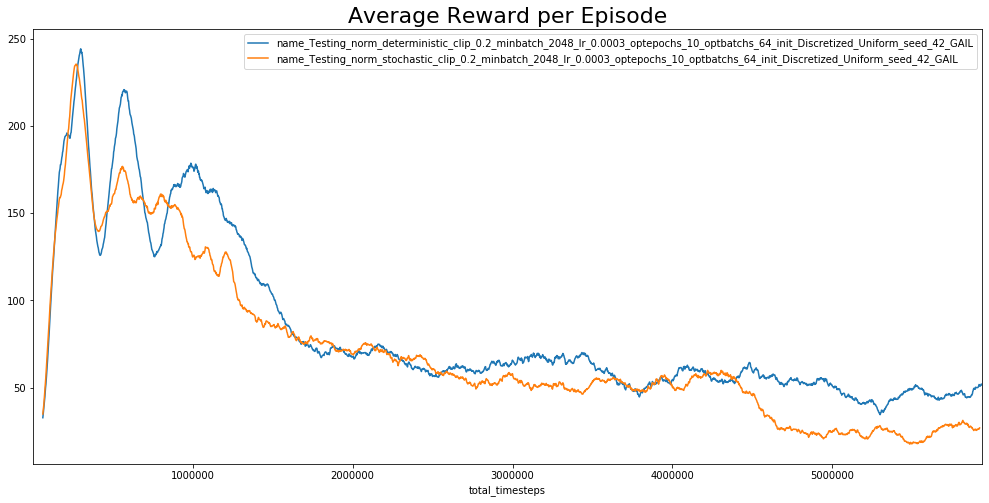

In [489]:
window_size = 30
fig , ax = plt.subplots(figsize=(17,8))

for name,group in df.groupby('name'):
    group['avg_c_reward_per_episode'].rolling(window_size).mean().plot(ax = ax , label=name)
plt.legend()
plt.title('Average Reward per Episode',size=22)
    

## Losses

/home/gabriel/anaconda3/envs/pyrep_raw/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Value Loss')

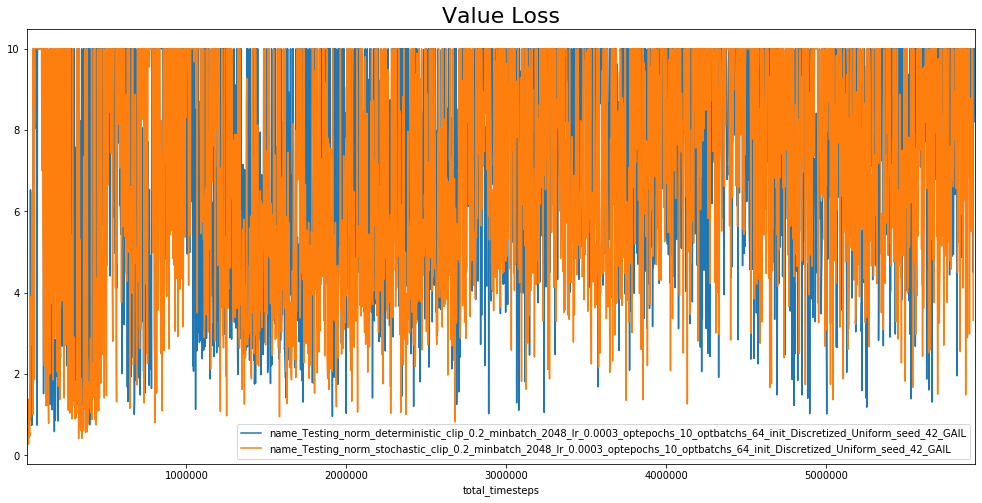

In [490]:
window_size = 1
fig , ax = plt.subplots(figsize=(17,8))

for name,group in df.groupby('name'):
    serie = group['value_loss']
    serie[serie>10] = 10
    serie.rolling(window_size).mean().plot(ax = ax , label=name)
plt.legend()
plt.title('Value Loss',size=22)
    

Text(0.5, 1.0, 'Discrim Loss')

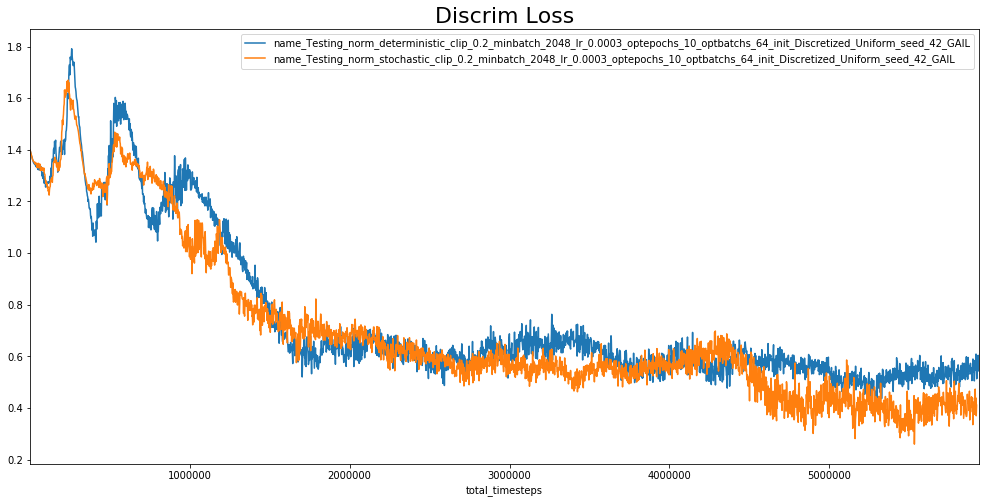

In [491]:
window_size = 1
fig , ax = plt.subplots(figsize=(17,8))

for name,group in df.groupby('name'):
    group['discrim_loss'].rolling(window_size).mean().plot(ax = ax , label=name)
plt.legend()
plt.title('Discrim Loss',size=22)
    

Text(0.5, 1.0, 'Policy Loss')

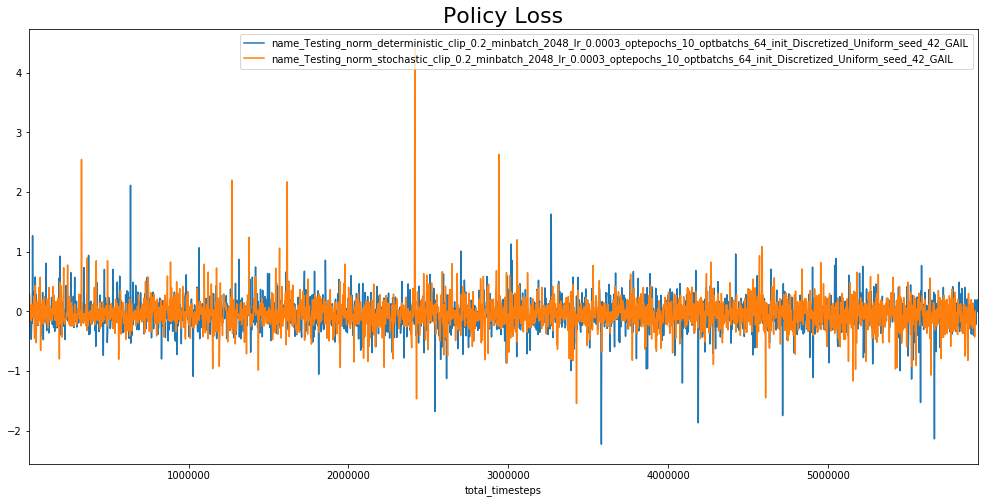

In [492]:
window_size = 1
fig , ax = plt.subplots(figsize=(17,8))

for name,group in df.groupby('name'):
    group['policy_loss'].rolling(window_size).mean().plot(ax = ax , label=name)
plt.legend()
plt.title('Policy Loss',size=22)
    

## Algos metrics

/home/gabriel/anaconda3/envs/pyrep_raw/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 1.0, 'Explained Variance')

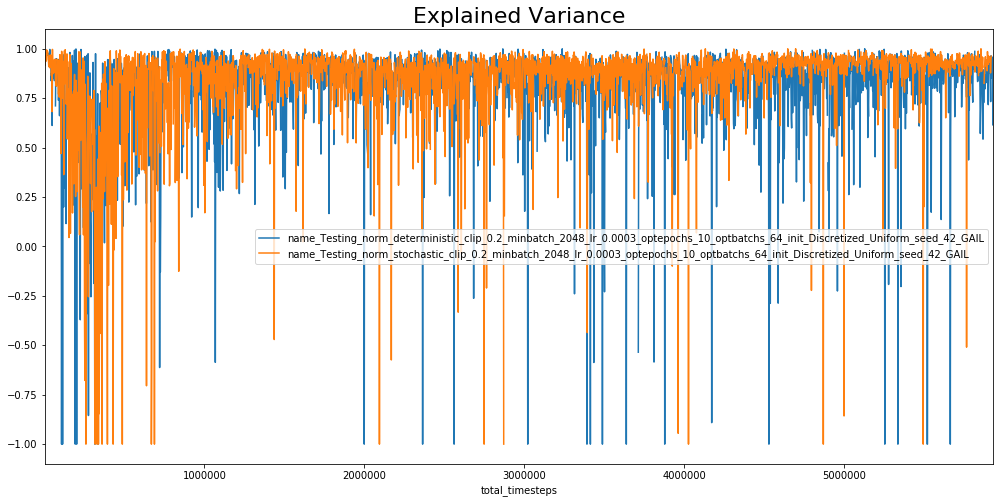

In [493]:
window_size = 1
fig , ax = plt.subplots(figsize=(17,8))

for name,group in df.groupby('name'):
    serie = group['explained_variance']
    serie[serie<-1]=-1
    serie.rolling(window_size).mean().plot(ax = ax , label=name)
plt.legend()
plt.title('Explained Variance',size=22)
    

Text(0.5, 1.0, 'Clip Frac')

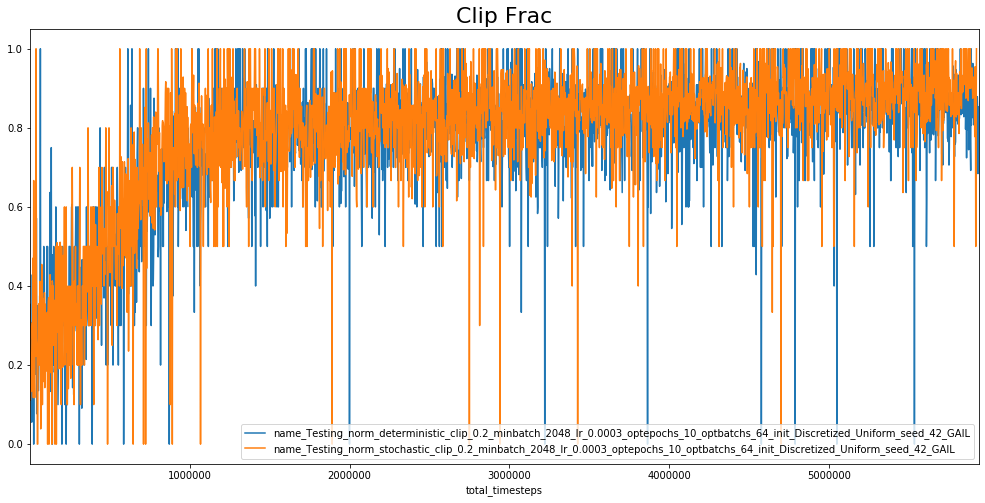

In [494]:
window_size = 1
fig , ax = plt.subplots(figsize=(17,8))

for name,group in df.groupby('name'):
    group['clipfrac'].rolling(window_size).mean().plot(ax = ax , label=name)
plt.legend()
plt.title('Clip Frac',size=22)
    

Text(0.5, 1.0, 'Entropy')

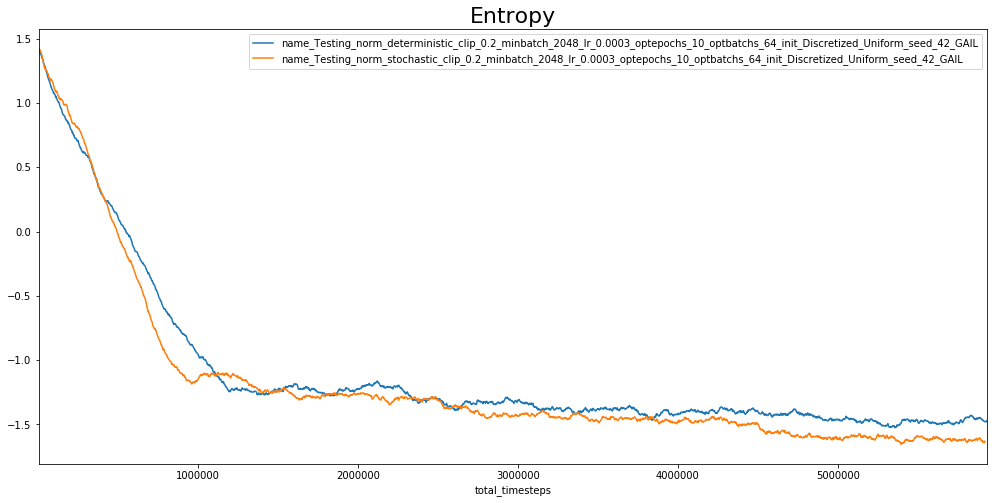

In [495]:
window_size = 1
fig , ax = plt.subplots(figsize=(17,8))

for name,group in df.groupby('name'):
    group['entropy'].rolling(window_size).mean().plot(ax = ax , label=name)
plt.legend()
plt.title('Entropy',size=22)
    

Text(0.5, 1.0, 'Approx Kl')

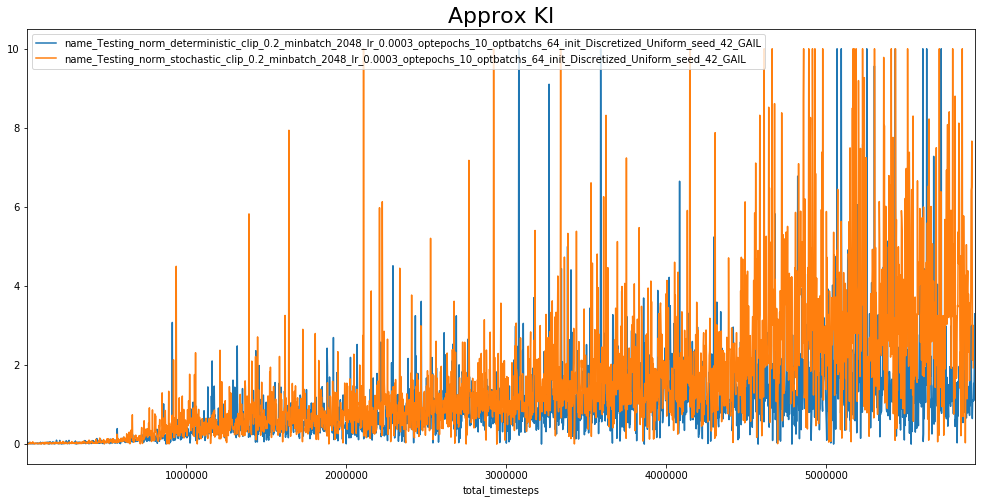

In [496]:
window_size = 1
fig , ax = plt.subplots(figsize=(17,8))

for name,group in df.groupby('name'):
    series = group['aproxkl'].copy()
    series[series>10]=10
    series.rolling(window_size).mean().plot(ax = ax , label=name)
plt.legend()
plt.title('Approx Kl',size=22)
    